# **Central Limit Theorem**

# Definition

The Central Limit Theorem (CLT) states that the sum of a **large number of independent random variables** will approximately follow a normal distribution (provided that all the random variables have finite variance).

In other words:

- Consider $n$ **independent** random variables $\{X_1, X_2, ..., X_n\}$
- With moments about the mean $\{\mu_i, \sigma_i^2, \mu_{3i}, ... \} \space \forall \space i \in {1, 2, ..., n}$
- $Y = \sum_{i=i}^n X_i$ $\implies$ $Y \mathrel{\dot\sim} N(\mu = \sum_{i=1}^n u_i \space, \space \sigma^2 = \sum_{i=1}^{n} \sigma_i^2)$


---


# Proof

Let $M_{i}(t)$ be the moment generating function (mgf) of random variable ($X_i - \mu_i)$

$M_i(t) = E(e^{t(X_i-\mu_i)}) = E(\sum_{k=0}^{\infty} \frac{(t(X_i-\mu_i))^k}{k!})$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$= E(1) + E(t(X_i-\mu_i)) +
E(\frac{t^2}{2}(X_i - \mu_i)^2) +
E(\frac{t^3}{3!}(X_i - \mu_i)^3) +
E(\frac{t^4}{4!}(X_i - \mu_i)^2)\space+\space...$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$=1 + 0 + \frac{t^2\sigma_i^2}{2} + \frac{t^3\mu_{i3}}{3!} +
\frac{t^4\mu_{i4}}{4!} \space + \space ...$

Let $Y^* = \frac{Y - \mu}{\sigma^2} = \sum_{i=1}^{n}\frac{X_i - \mu_i}{\sigma^2}$

Since all pairs of $X_i, X_j$ are independently distributed, the mgf of $Y^*$ is:

$M_{Y^*}(t) = \Pi_{i=1}^{n} M_i(\frac{t}{\sigma^2}) = 1 +
\frac{t^2\sigma_i^2}{\sigma^2 2} +
\frac{t^3\mu_{i3}}{\sigma^3 3!} +
\frac{t^4\mu_{i4}}{\sigma^4 4!} \space + \space ...$

We are assuming that $n$ is large, thus $\sigma^2$ will be large and all the coefficients that have the term $\frac{\mu_i^k}{\sigma^k}$ are negligible (because $k > 2 \implies \sigma^k$ is even larger). Hence:

$M_{Y^*}(t) \approxeq \Pi_{i=1}^{n} (1 + \frac{t^2 \sigma_i^2}{2 \sigma^2})$

$ln(M_{Y^*}(t)) \approxeq \sum_{i=1}^{n} ln(1 + \frac{t^2 \sigma_i^2}{2 \sigma^2}) \approxeq
\sum_{i=1}^{n}\frac{t^2 \sigma_i^2}{2 \sigma^2} =
\frac{t^2}{2} \frac{1}{\sigma^2} \sum_{i=1}^{n} \sigma_i^2 = \frac{t^2}{2}$

$\implies M_{Y^*}(t) \approxeq e^{\frac{t^2}{2}} \implies Y^* \mathrel{\dot\sim} N(0, 1) \implies Y \mathrel{\dot\sim} N(\mu, \sigma^2)$

---

Import libraries


In [ ]:
import numpy as np
import pandas as pd
from math import sqrt
from scipy import stats
import matplotlib.pyplot as plt

I will declare 50 independent random variables

- 10 Binomial random variables
- 10 Poisson random variables
- 10 identical Exponentials with $\lambda = 1$ (I will scale the pdfs by another lambda later)
- 10 Normal random variables
- 10 $\chi_f^2$ random variables


In [ ]:
# Initiate list where we'll be storing our random variables
X = []

In [ ]:
# Add 10 binomials
for i in range(10):
  np.random.seed(i * 10)
  n = np.random.randint(low=50, high=100)
  p = 1 / np.random.randint(low=2, high=10)
  X.append(stats.binom(n=n, p=p))

In [ ]:
# Add 10 poissons
for i in range(10):
  np.random.seed(i * 20)
  mu = np.random.randint(low=0, high=20)
  X.append(stats.poisson(mu=mu))

In [ ]:
# Add 10 exponentials
for i in range(10):
  X.append(stats.expon())

In [ ]:
# Add 10 normals
for i in range(10):
  np.random.seed(i * 40)
  mu = np.random.randint(low=-100, high=100)
  s2 = np.random.randint(low=1,  high=30)
  X.append(stats.norm(loc=mu, scale=sqrt(s2)))

In [ ]:
# Add 10 chi squares
for i in range(10):
  np.random.seed(i * 50)
  df = np.random.randint(low=1, high=30)
  X.append(stats.chi2(df=df))

Extract 10,000 random samples from each of the 50 random variables and store the in a data frame

In [ ]:
# Declare data frame and fill it in
df = pd.DataFrame()
for i in range(len(X)):
  df['X_' + str(i + 1)] = X[i].rvs(10000).tolist()

# Create list of column names
cols = []
for dist in ['B_','P_','e_','N_','X2_']:
  for i in range(1, 11):
    cols.append(dist + str(i))

# Overwrite df's column names
df.columns = cols

# Scale exponential distributions
np.random.seed(123)
# Store the lambdas (since they cannot be saved as a parameter)
lambdas = []
for exp in [col for col in df.columns if col[:2] == 'e_']:
  lmb = np.random.randint(low=1, high=20)
  lambdas.append(lmb)
  df[exp] = lmb * df[exp]**lmb

Declare $Y = \sum_{i=1}^{50} X_i$

In [ ]:
df['Y'] = df.sum(axis=1)

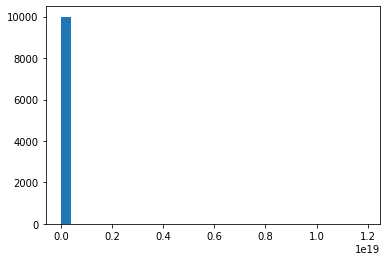

In [ ]:
plt.hist(df['Y'], bins=30)
plt.show()